# 3. Define Custom Loss and Metric

In [1]:
# Load usefull libraries and helper functions
%run libs_and_utils

seed =  42
libraries loaded


In [2]:
# Load data
df_train = pd.read_csv(r'input/creditcard_train.csv')
df_train.sort_values(by=['Time'], inplace=True)
df_test = pd.read_csv(r'input/creditcard_test.csv')
df_test.sort_values(by=['Time'], inplace=True)

X_train = df_train.drop(columns='Class')
y_train = df_train.Class
X_test = df_test.drop(columns='Class')
y_test = df_test.Class
print('data_loaded')

data_loaded


### Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification (copyied from competition) .

Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).
The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives.
Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.
A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.

In [3]:
%%time
# use custom metric optimization function
LGBM_custom_metric(X_train, X_test, y_train, y_test, auprc_loss, num_boost_round=100, early_stopping_rounds=10, lambda_l2=10, verbose_eval=10)

[LightGBM] [Info] Number of positive: 364, number of negative: 199000
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040437 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001826 -> initscore=-6.303906
[LightGBM] [Info] Start training from score -6.303906
Training until validation scores don't improve for 10 rounds
[10]	train's binary_logloss: 0.00385782	train's auprc: 0.858745	test's binary_logloss: 0.00403302	test's auprc: 0.739755
[20]	train's binary_logloss: 0.00267778	train's auprc: 0.89325	test's binary_logloss: 0.00320128	test's auprc: 0.768834
[30]	train's binary_logloss: 0.00208533	train's auprc: 0.915102	test's binary_logloss: 0.00285899	test's auprc: 0.785269
[40]	train's binary_logloss: 0.00170859	train's auprc: 0.932348	test's binary_lo

## Use Cross-Validation

[LightGBM] [Info] Number of positive: 291, number of negative: 159200
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] Number of positive: 291, number of negative: 159200
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 159491, number of used features: 30
[LightGBM] [Info] Number of positive: 291, number of negative: 159200
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.032667 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[Ligh

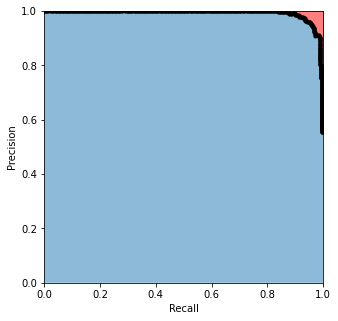

auprc test =  0.8126808522985152


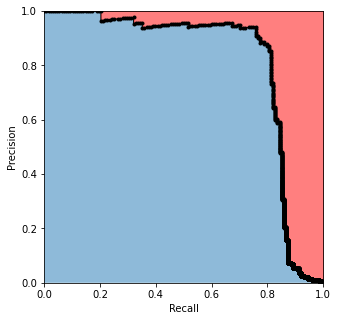

Wall time: 19.7 s


In [4]:
%%time
eval_hist = LGBM_custom_metric_cv(X_train, X_test, y_train, y_test, auprc_loss, nfold= 5, num_boost_round=100, early_stopping_rounds=None, lambda_l2=10, verbose_eval=10)
plot_from_eval_hist(eval_hist, X_train, X_test, y_train, y_test)

## Now add under/oversampling

In [5]:
# Undersample randomly
#alpha_under = 0.01
#under = RandomUnderSampler(random_state=42, sampling_strategy=alpha_under)

# Oversampl using SMOTE
alpha_over = 0.1
over = SMOTE(random_state=42, sampling_strategy=alpha_over)

In [6]:
print(X_train.shape, y_train.shape, sum(y_train==1))

#X_train_res, y_train_res = under.fit_resample(X_train, y_train)
#print(X_train_res.shape, y_train_res.shape, sum(y_train_res==1))

X_train_res, y_train_res = over.fit_resample(X_train, y_train)
print(X_train_res.shape, y_train_res.shape, sum(y_train_res==1))

(199364, 30) (199364,) 364
(218900, 30) (218900,) 19900


[LightGBM] [Info] Number of positive: 15920, number of negative: 159200
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039053 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 175120, number of used features: 30
[LightGBM] [Info] Number of positive: 15920, number of negative: 159200
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.034953 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 175120, number of used features: 30
[LightGBM] [Info] Number of positive: 15920, number of negative: 159200
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033616 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650

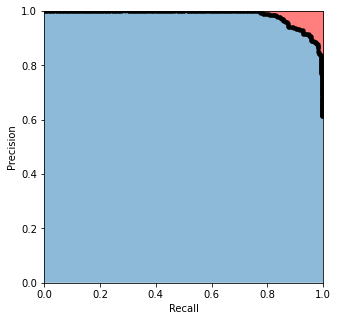

auprc test =  0.8154905477310663


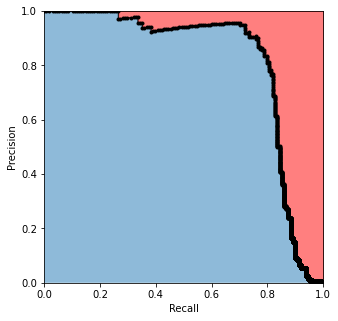

Wall time: 23.4 s


In [7]:
%%time
eval_hist = LGBM_custom_metric_cv(X_train_res, X_test, y_train_res, y_test, auprc_loss, nfold=5, num_boost_round=100, early_stopping_rounds=None, lambda_l2=10, verbose_eval=10)
plot_from_eval_hist(eval_hist, X_train, X_test, y_train, y_test)

- As we see validation score is very different since we train on resampled train data and test on test data
- SMOTE upsampling improves the score on test set